# Homework 3
### Due: Thursday Feb. 27

#### Numerical Derivative VS Known Derivative

Consider the function $ 1 + \frac{1}{2} + tanh(2x)$. You should be able to write the derivative without much effort (if not feel free to google it, remember hyperbolic trig functions behave similarly to their traditional counterparts when differentiating).

Calculate the derivative of this function in the range $-2 \le x \le 2$ using the central difference method. Choose your own (**suitable**) spacing. Plot your computed derivative as points and use a line to plot the analytic solution through the same points. How accurate is your computed derivative?

(20 points)

0.0026819031504476953
0.1413017339243483
1.999999333333502
0.14130173392423728
0.00268190315066974


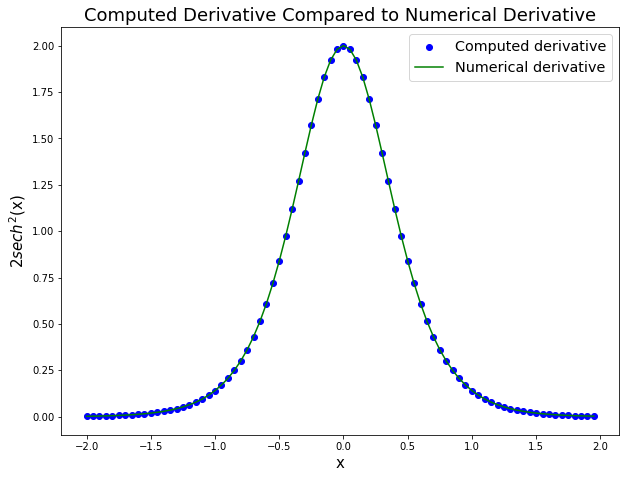

In [1]:
# code
# Derivative of 1+(1/2)+tanh(2x) = 2sech^2(2x)

import math
import numpy as np
import matplotlib.pyplot as plt

def sech(x): 
    return 1/np.cosh(x)

def func(x): 
    return 1+(1/2)+np.tanh(2*x)

# Define a step size h
h = 0.001

# Calculate derivative using central difference method
def df_dx(x): 
    return (func(x+h/2)-func(x-h/2))/h

for x in range(-2,3,1): 
    print(df_dx(x))

# Plot the points and plot the function through the points
x = np.arange(-2, 2, 0.05)

plt.figure(figsize=(10, 7.5))     # Must come first in code, otherwise error with legend and labels will occur.

#for x in range(-2,3,1): 
plt.scatter(x, df_dx(x), c = 'blue', label = 'Computed derivative')
plt.plot(x, df_dx(x), c = 'green', label = 'Numerical derivative')

plt.title("Computed Derivative Compared to Numerical Derivative", size = 18)
plt.xlabel("x", size = 15)
plt.ylabel("2$sech^2$(x)", size = 15)
plt.legend(fontsize='x-large')

plt.show()

My computed derivative for the function $1+\frac{1}{2}+tanh(2x)$ appears to be quite accurate. I can determine the accuracy as being good because the "plot" plot goes through all of the points in the "scatter" plot.

#### Electric field of a charge distribution

We're all well aware of the endless fun one can have finding analytic solutions to electrostatic problems. But I propose to you that it is even more fun to let the computer do the work! Once you've carefully written the code.

Recall the electric potential at a distance $r$ from a point charge is given by $\phi = q/4 \pi \epsilon_0 r$, and the electric field can be found by $\vec{E} = - \nabla \phi$.

Consider two charges, of $\pm C$, 10 cm apart. Calculate the electric potential on a 1m x 1m plane surrounding the charges, using a grid of points spaced 1 cm apart. Plot the potential. (Note: 1 cm is a starting point, once you plot the potential you may decide you want a more or less dense grid, feel free to choose a grid that looks good. The computation should be fast enough to play around with this parameter.) The easiest way to plot a 2-dimensional array of scalar values is to use the `imshow` function in `matplotlib.pyplot`. The function will accept as its first argument a 2D array and produce a map with somewhat reasonable colors, but you can also pass kwargs for `cmap`, `vmin`, and `vmax`. The documentation will be helpful.

(20 points)

You may find a few points very close to the charges end up being "too close" and the very small distances lead to floating point issues. A normal solution to this type of issue is to use a "softening" parameter, which is a small number that is used as an enforced minimum, i.e. if your calculated number is less than the softening parameter, use the softening parameter instead. 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


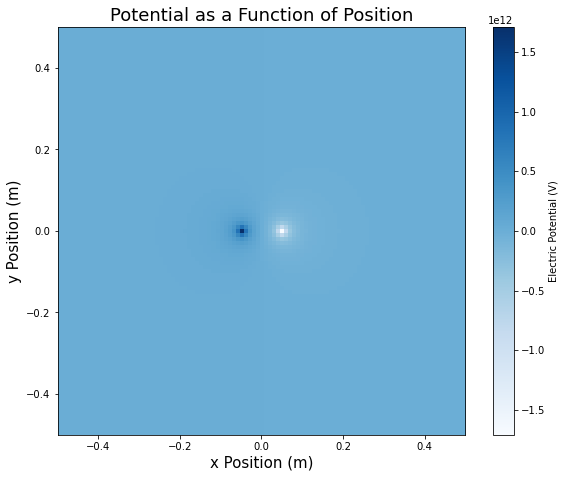

Charges are correctly spaced along the x-axis. Dividing by near-zero values means I need to define a 
 softening parameter epsilon to make the potentials appear more reasonable on the graph.
My softening parameter has a relatively large value, which means my code for the potential may be bugged. 
 Usually a softening parameter would have a smaller value. Also, the potential should not reach a 
 magnitude of 10^12, especially with the softening parameter present.


In [2]:
# code
GridPts_x = np.arange(-0.5, 0.51, 0.01)     #-0.5 m to 0.5 m (-50 cm to 50 cm), step size 1 cm
GridPts_y = np.arange(-0.5, 0.51, 0.01)     # y-axis, second dimension
FSPermittivity = 8.854*10**(-12)     # Farads/meter, SI units

q1 = 1     # First charge
q2 = -1     # Second charge

GridPts_all = np.zeros((len(GridPts_x), len(GridPts_y)))
    
print(GridPts_all)

for j in range(len(GridPts_y)): 
    y = GridPts_y[j]     # Define y
    for i in range(len(GridPts_x)): 
        x = GridPts_x[i]     # Define x
        epsilon = 5*10**(-3)    # Define this parameter to avoid extremely large potentials on the order of 10^25 V
        r1 = max(((((x+0.05)**2)+(y**2))**(1/2)), epsilon)     # Charge 1 at a location of -5 cm on the x-axis
        r2 = max(((((x-0.05)**2)+(y**2))**(1/2)), epsilon)     # Charge 2 at a location of +5 cm on the x-axis
        # max() uses the greater value between the distance before the comma and the softening parameter after the comma
        # Assume r1 and r2 lie on the x-axis at specified distances
        Potential = (1/(4*np.pi*FSPermittivity))*((q1/r1)+(q2/r2))
        GridPts_all[j, i]= Potential     # Need to index y first because of starting with j for loop

# Use print statements inside for loop to debug 

# Plot potential (phi) as a function of r (GridPts)
plt.figure(figsize=(10, 7.5))

plt.imshow(GridPts_all, cmap= 'Blues', origin= 'lower', extent=[-0.5, 0.5, -0.5, 0.5])     # Switch x- and y-axes due to for loop order

plt.title("Potential as a Function of Position", size = 18)
plt.xlabel("x Position (m)", size = 15)
plt.ylabel("y Position (m)", size = 15)
plt.colorbar(label= "Electric Potential (V)")
plt.show()

print("Charges are correctly spaced along the x-axis. Dividing by near-zero values means I need to define a \n softening parameter epsilon to make the potentials appear more reasonable on the graph.")

print("My softening parameter has a relatively large value, which means my code for the potential may be bugged. \n Usually a softening parameter would have a smaller value. Also, the potential should not reach a \n magnitude of 10^12, especially with the softening parameter present.")

Use the electric potential you calculated above to calculate the electric field on the same grid. You may find it convenient to track the x and y components of the electric field in separate 2 dimensional arrays. Recall the instructions in Chapter 5 for computing partial derivatives.

Visualizing this electric field is a bit trickier, since the field has both magnitude and direction. `imshow` may be useful for debugging the x or y components, but visualizing the whole field requires we use both components to plot the field. `matplotlib.pyplot` provides a vfunction called `quiver` that produces a plot of arrows; it accepts as its first two arguments two 2-Dimensional arrays specifying the x and y components of each arrow on the grid.

(30 points)

You will likely have a similar problem as above with "too close" points, but it will be much worse. The magnitude of the electric field very close to the charges may cause your plot to look very bad, almost nonsensical. Limiting the magnitude of your vectors may help. (i.e. if the quadrature sum of the components is too high, reduce the components)

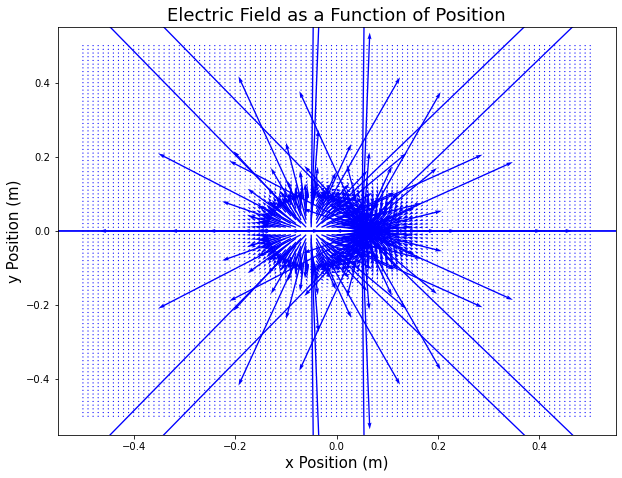

In [3]:
# code
import sympy as sp     # For partial derivative calculations

# Define coordinates x and y for potential and electric field
x, y = sp.symbols('x y')

GridPts_x = np.arange(-0.5, 0.51, 0.01)     #-0.5 m to 0.5 m (-50 cm to 50 cm), step size 1 cm
GridPts_y = np.arange(-0.5, 0.51, 0.01)     # y-axis, second dimension
FSPermittivity = 8.854*10**(-12)     # Farads/meter, SI units

q1 = 1     # First charge
q2 = -1     # Second charge

epsilon = 5*10**(-3)    # Define this parameter to avoid extremely large potentials on the order of 10^25 V
r1 = sp.Max(((((x+0.05)**2)+(y**2))**(1/2)), epsilon)     # Charge 1 at a location of -5 cm on the x-axis
r2 = sp.Max(((((x-0.05)**2)+(y**2))**(1/2)), epsilon)     # Charge 2 at a location of +5 cm on the x-axis

# Define potential before the loop
Potential = (1/(4*np.pi*FSPermittivity))*((q1/r1)+(q2/r2))

# Must use sp.Max instead of Python's max because numerical values for EField are not yet calculated

dV_dx = sp.diff(Potential, x)     # Partial derivative of V w.r. to x
dV_dy = sp.diff(Potential, y)     # Partial derivative of V w.r. to y

# 2d electric field arrays
E_x_vals = np.zeros((len(GridPts_y), len(GridPts_x)))
E_y_vals = np.zeros((len(GridPts_y), len(GridPts_x)))

for j in range(len(GridPts_y)): 
    for i in range(len(GridPts_x)): 
        # Provide E_x and E_y numerical values
        E_x_vals[j, i] = -float(dV_dx.subs({x: GridPts_x[i], y: GridPts_y[j]}).evalf())
        E_y_vals[j, i] = -float(dV_dy.subs({x: GridPts_x[i], y: GridPts_y[j]}).evalf())
        
#        GridPts_all[j, i] = sp.sqrt(E_x**2 + E_y**2)     # np.sqrt generates an error
        
# Create plotting meshgrid
X, Y = np.meshgrid(GridPts_x, GridPts_y)
        
# Plot the electric field
plt.figure(figsize=(10, 7.5))

plt.quiver(X, Y, E_x_vals, E_y_vals, color='blue')

plt.title("Electric Field as a Function of Position", size = 18)
plt.xlabel("x Position (m)", size = 15)
plt.ylabel("y Position (m)", size = 15)
plt.show()

### Solving matrices

Exercises 6.1 in your book shows a network of resistors and suggests a method to solve for V at each point. Write out the full system of equations and then implement the code to solve them using Gaussian elimination. As usual, some code to solve the problem is provided, but you will find it more instructive to first attempt to code the solution yourself. The code is there if you get stuck. As usual I don't want to see identical code in multiple assignments!

(15 points)

Exercise 6.2 is an extension of 6.1. Complete parts a) and b) for (10 points)

Finally, Exercise 6.4 instructs you to verify you get the same answer using [numpy](https://numpy.org/doc/2.1/reference/generated/numpy.linalg.solve.html#numpy.linalg.solve). (5 points)

For the junction at voltage $V_1$, the equation given by the textbook is: $\frac{V_1-V_2}{R}+\frac{V_1-V_3}{R}+\frac{V_1-V_4}{R}+\frac{V_1-V_+}{R}= 0$

A simplified version of the equation is as follows: $4V_1-V_2-V_3-V_4= V_+= 5$ $V$

An equation for the junction at $V_2$ would be: $\frac{V_2-V_1}{R}+\frac{V_2-V_4}{R}+\frac{V_2-0}{R}= 0$, otherwise written as $-V_1+3V_2-V_4= 0$ $V$.

The equation for $V_3$ is then: $-V_1+3V_3-V_4= V_+= 5$ $V$.

Similarly for $V_4$, the equation is: $-V_1-V_2-V_3+4V_4= 0$ $V$.

With this, we can add all four equations together and obtain: $V_1+V_2+V_3+V_4= 20$ $V$. Through Gaussian elimination, we can solve for the values of $V_1$ to $V_4$.

In [4]:
# Solve for V at each point from Exercise 6.1
# Define variables matrix
EqnMatrix_i = np.array([[4, -1, -1, -1], 
           [-1, 3, 0, -1], 
           [-1, 0, 3, -1], 
           [-1, -1, -1, 4]], float)

# Define vector used for RHS
VMatrix_i = np.array([5, 0, 5, 0], float)
numCols = len(VMatrix_i)

for c in range(numCols): 
    # Divide by diagonal elements
    div = EqnMatrix_i[c, c]
    EqnMatrix_i[c, :] /= div
    VMatrix_i[c] /= div
    
    # Subtract from lower rows
    for i in range(c+1, numCols): 
        mult = EqnMatrix_i[i, c]
        EqnMatrix_i[i, :] -= mult*EqnMatrix_i[c, :]
        VMatrix_i[i] -= mult*VMatrix_i[c]

x = np.empty(numCols, float)
for c in range(numCols-1, -1, -1): 
    x[c] = VMatrix_i[c]
    for i in range(c+1, numCols): 
        x[c] -= EqnMatrix_i[c, i]*x[i]
        
print(x)

print("Through Gaussian elimination, I can conclude that V_1 =", x[0], "V, V_2 =", x[1], "V, V_3 =", x[2], "V, and V_4 =", x[3], "V.")

[3.         1.66666667 3.33333333 2.        ]
Through Gaussian elimination, I can conclude that V_1 = 3.0 V, V_2 = 1.6666666666666665 V, V_3 = 3.3333333333333335 V, and V_4 = 2.0 V.


In [5]:
# code
# Exercise 6.2 parts a and b
# Part a- Modify gausselim.py in Example 6.1 to incorporate partial pivoting. Run program to verify answers are the
# same as the original program when applied to Eq. 6.1
EqnMatrix_i = np.array([[4, -1, -1, -1], 
           [-1, 3, 0, -1], 
           [-1, 0, 3, -1], 
           [-1, -1, -1, 4]], float)

VMatrix_i = np.array([5, 0, 5, 0], float)
numCols = len(VMatrix_i)

# Define swap rows function and use it in the first for loop
def swap_rows(EqnMatrix_i, Row1, Row2): 
    EqnMatrix_i[[c, d]] = EqnMatrix_i[[d, c]]
    return EqnMatrix_i

for c in range(numCols):
    for d in range(c+1, numCols): 
        if abs(EqnMatrix_i[c][c]) < abs(EqnMatrix_i[d][c]): 
            swap_rows(EqnMatrix_i, c, d)
            swap_rows(VMatrix_i, c, d)
    
    # Divide by diagonal elements
    div = EqnMatrix_i[c, c]
    EqnMatrix_i[c, :] /= div
    VMatrix_i[c] /= div
    
    # Subtract from lower rows
    for i in range(c+1, numCols): 
        mult = EqnMatrix_i[i, c]
        EqnMatrix_i[i, :] -= mult*EqnMatrix_i[c, :]
        VMatrix_i[i] -= mult*VMatrix_i[c]

x = np.empty(numCols, float)
for c in range(numCols-1, -1, -1): 
    x[c] = VMatrix_i[c]
    for i in range(c+1, numCols): 
        x[c] -= EqnMatrix_i[c, i]*x[i]
        
print(x)

print("Through partial pivoting, I can conclude that V_1 =", x[0], "V, V_2 =", x[1], "V, V_3 =", x[2], "V, and V_4 =", x[3], "V.")

[3.         1.66666667 3.33333333 2.        ]
Through partial pivoting, I can conclude that V_1 = 3.0 V, V_2 = 1.6666666666666665 V, V_3 = 3.3333333333333335 V, and V_4 = 2.0 V.


In [6]:
# Part b- Modify the program to solve the equations in 6.17 and show that the program can find these solutions also
# even though Gaussian elimination without pivoting fails
EqnMatrix_i = np.array([[0, 1, 4, 1], 
           [3, 4, -1, -1], 
           [1, -4, 1, 5], 
           [2, -2, 1, 3]], float)

VMatrix_i = np.array([-4, 3, 9, 7], float)
numCols = len(VMatrix_i)

# Define swap rows function and use it in the first for loop
def swap_rows(EqnMatrix_i, c, d): 
    EqnMatrix_i[[c, d]] = EqnMatrix_i[[d, c]]
#     print("INSIDE FUNC", EqnMatrix_i)
    return EqnMatrix_i

for c in range(numCols): 
    for d in range(c+1, numCols): 
        if abs(EqnMatrix_i[c][c]) < abs(EqnMatrix_i[d][c]): 
#            print("EqnMatrix before swapping: ", EqnMatrix_i)
            EqnMatrix_i = swap_rows(EqnMatrix_i, c, d)
#            print("EqnMatrix after swapping: ", EqnMatrix_i)
#            print("VMatrix before swapping: ", VMatrix_i)
            VMatrix_i = swap_rows(VMatrix_i, c, d)
#            print("VMatrix after swapping: ", VMatrix_i)
            
#    print(EqnMatrix_i, "\n")
#    print(EqnMatrix_i[c], "\n\n")
    
    # Divide by diagonal elements
    div = EqnMatrix_i[c, c]
    EqnMatrix_i[c, :] /= div
    VMatrix_i[c] /= div
    
    # Subtract from lower rows
    for i in range(c+1, numCols): 
        mult = EqnMatrix_i[i, c]
        EqnMatrix_i[i, :] -= mult*EqnMatrix_i[c, :]
        VMatrix_i[i] -= mult*VMatrix_i[c]

x = np.empty(numCols, float)
for c in range(numCols-1, -1, -1): 
    x[c] = VMatrix_i[c]
    for i in range(c+1, numCols): 
        x[c] -= EqnMatrix_i[c, i]*x[i]
        
print(x)

print("Through partial pivoting, I can conclude that V_1 =", x[0], "V, V_2 =", x[1], "V, V_3 =", x[2], "V, and V_4 =", x[3], "V.")

print("Contrary to my original belief about this set of equations, the answers calculated are correct, not bugged.")

[ 1.61904762 -0.42857143 -1.23809524  1.38095238]
Through partial pivoting, I can conclude that V_1 = 1.6190476190476193 V, V_2 = -0.4285714285714288 V, V_3 = -1.2380952380952381 V, and V_4 = 1.3809523809523807 V.
Contrary to my original belief about this set of equations, the answers calculated are correct, not bugged.


In [7]:
# Exercise 6.4- Solve resistor network problem using solve from np.linalg and show that answer is the same
EqnMatrix_i = np.array([[4, -1, -1, -1], 
           [-1, 3, 0, -1], 
           [-1, 0, 3, -1], 
           [-1, -1, -1, 4]], float)

# Define vector used for RHS
VMatrix_i = np.array([5, 0, 5, 0], float)

x = np.linalg.solve(EqnMatrix_i, VMatrix_i)     # Solve for the EqnMatrix variables using np.linalg.solve

print(x)

print("Through using solve from NumPy, I can conclude that V_1 =", x[0], "V, V_2 =", x[1], "V, V_3 =", x[2], "V, and V_4 =", x[3], "V.")

[3.         1.66666667 3.33333333 2.        ]
Through using solve from NumPy, I can conclude that V_1 = 3.000000000000001 V, V_2 = 1.666666666666667 V, V_3 = 3.333333333333334 V, and V_4 = 2.000000000000001 V.
